In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [46]:
iris = datasets.load_iris()
feature_names = iris.feature_names[:-1]
x = pd.DataFrame(iris.data[:-1], columns = iris.feature_names)
x = x[feature_names]
y = pd.DataFrame(iris.target, columns = ['target'])
print( x.shape, y.shape)

(149, 3) (150, 1)


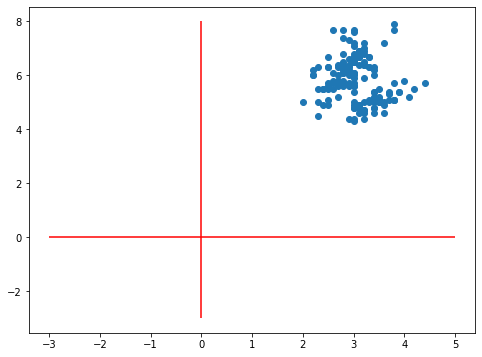

In [47]:
plt.figure(figsize = (8,6))
plt.scatter(x = x.iloc[:,1], y = x.iloc[:,0])
plt.vlines(0, -3, 8, colors = 'red')
plt.hlines(0, -3, 5, colors = 'red')
plt.show()

In [50]:
from sklearn.preprocessing import StandardScaler
sds = StandardScaler()
x[feature_names] = sds.fit_transform(x[feature_names])

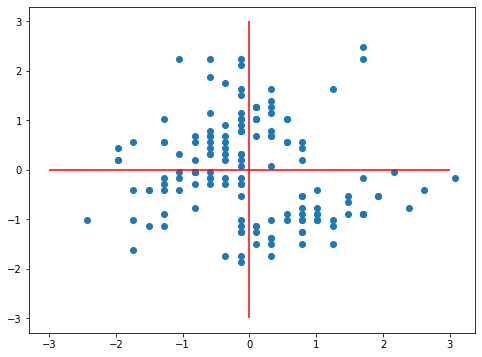

In [51]:
plt.figure(figsize = (8,6))
plt.scatter(x = x.iloc[:,1], y = x.iloc[:,0])
plt.vlines(0, -3, 3, colors = 'red')
plt.hlines(0, -3, 3, colors = 'red')
plt.show()

In [92]:
np.corrcoef(x.T)

array([[ 1.        , -0.11751769,  0.87312238],
       [-0.11751769,  1.        , -0.42862713],
       [ 0.87312238, -0.42862713,  1.        ]])

In [90]:
np.cov(x.T)

array([[ 1.00675676, -0.11831173,  0.87902185],
       [-0.11831173,  1.00675676, -0.43152326],
       [ 0.87902185, -0.43152326,  1.00675676]])

In [91]:
COV(x)

array([[ 1.        , -0.11751769,  0.87312238],
       [-0.11751769,  1.        , -0.42862713],
       [ 0.87312238, -0.42862713,  1.        ]])

In [79]:
def COV(x):
    cov = (1/len(x))*np.dot((x - np.mean(x)).T, (x-np.mean(x)))
    return cov
print(COV(x),'\n')


eigen_value, eigen_vector =  np.linalg.eig(COV(x))

print(eigen_value, eigen_vector, sep = '\n\n')

[[ 1.         -0.11751769  0.87312238]
 [-0.11751769  1.         -0.42862713]
 [ 0.87312238 -0.42862713  1.        ]] 

[2.0226846  0.06977649 0.90753891]

[[-0.62919878  0.64544868  0.43301835]
 [ 0.36082889 -0.25087682  0.89825572]
 [-0.68841223 -0.72142694  0.07504514]]


In [77]:
fit_data = pd.DataFrame(np.dot(x, eigen_vector), columns = ['PC 1', 'PC 2', 'PC 3'])
fit_data

,PC 1,PC 2,PC 3
0,1.848526,0.128147,0.422960
1,1.586551,0.260059,-0.712113
2,1.943173,0.029987,-0.408766
3,1.858223,-0.072293,-0.658637
4,2.007300,-0.007363,0.576763
...,...,...,...
144,-1.212969,-0.270294,1.030619
145,-1.265970,0.107126,0.391030
146,-1.297828,0.165037,-0.857149
147,-1.114000,-0.048769,0.286443


In [55]:
from sklearn.decomposition import PCA

In [117]:
pca = PCA(n_components=3)
pca.fit(x)

PCA(n_components=3)

In [62]:
pca.explained_variance_

array([2.03635139, 0.91367093, 0.07024795])

In [109]:
lambda1 = eigen_value[0]
lambda2 = eigen_value[1]
lambda3 = eigen_value[2]



array([2.0226846 , 0.06977649, 0.90753891])

In [116]:
pd.DataFrame(np.round(pca.explained_variance_ratio_ * 100,2).reshape(1,-1),columns = ['pc 1','pc 2','pc 3'])

,pc 1,pc 2,pc 3
0,67.42,30.25,2.33


In [93]:
e_v = pca.components_

In [94]:
e_v

array([[ 0.62919878, -0.36082889,  0.68841223],
       [ 0.43301835,  0.89825572,  0.07504514],
       [-0.64544868,  0.25087682,  0.72142694]])

In [95]:
eigen_vector

array([[-0.62919878,  0.64544868,  0.43301835],
       [ 0.36082889, -0.25087682,  0.89825572],
       [-0.68841223, -0.72142694,  0.07504514]])

In [68]:
PCscore = pca.transform(x)
PCscore[-5:]

array([[ 1.21296945,  1.03061876,  0.27029435],
       [ 1.26597042,  0.39102987, -0.10712618],
       [ 1.29782827, -0.85714927, -0.16503738],
       [ 1.11399977,  0.28644276,  0.04876931],
       [ 0.63303379,  0.96246983,  0.59475317]])